## 데이터

In [1]:
# importing libraries
! pip install plotly==4.14.3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

     |████████████████████████████████| 13.2 MB 136 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## 데이터 불러오기

In [2]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.StringIO(uploaded['hotel_bookings.csv'].decode('utf-8', 'ignore')))

Saving hotel_bookings.csv to hotel_bookings.csv


## 데이터 살펴보기

In [3]:
# 데이터 살펴보기
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# 결측치 확인하기
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [7]:
# 결측치 대체하기

df.fillna(0, inplace = True)

In [8]:
# children, adults, babies가 모두 0일 수는 없기 때문에 해당 열은 drop한다.

filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [9]:
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


## 1) EDA

1. 숙박객들은 어디에서 올까?

In [10]:
# country에 따른 실제 고객 수, 취소하지 않은(0) 고객을 살펴보자
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)    # 인덱스 이름 바꾸기

total_guests = country_data["Number of Guests"].sum()    # 총 고객 수 구하기

country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)   # 열 추가 : 실제 고객/전체 고객 * 100 (소수점 두자리까지 표시)

country_data["country"] = country_data.index    # 인덱스를 열로 추가 

country_data

,Number of Guests,Guests in %,country
PRT,20977,27.97,PRT
GBR,9668,12.89,GBR
FRA,8468,11.29,FRA
ESP,6383,8.51,ESP
DEU,6067,8.09,DEU
...,...,...,...
SLE,1,0.00,SLE
MRT,1,0.00,MRT
NCL,1,0.00,NCL
NAM,1,0.00,NAM


In [11]:
# 파이 차트로 시각화
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")

fig.update_traces(textposition="inside", textinfo="value+percent+label")    # 텍스트 파이 차트 안에 넣기, 값+퍼센테이지+라벨 표시
fig.show()

In [12]:
# 지도로 시각화하기
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"], 
                    hover_name=country_data.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()

### 전 세계적으로 이 두 호텔에 방문하지만, 특히 포르투갈 & 유럽

2. 숙박객들은 1박에 얼마를 지불할까?

In [13]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


- 호텔들은 크게 리조트 호텔과 도시 호텔로 나누어져있다.
- 각각의 호텔들은 다른 room types, meal arrangements, 주차공간 여부 등을 가지고 있다.
- 또한 호텔산업은 시즈널리티에 큰 영향을 받기 때문에 가격이 다양하다고 할 수 있다.

In [14]:
data = df[df['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel')

- 해당 box plot에서 평균 객실의 가격은 방의 type과 표준편차에 따라 다른 것을 알 수 있다. 

## 3. 1년 동안 1박당 가격이 어떻게 달라질까?

In [15]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [16]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [17]:
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [18]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort_hotel', 'price_for_city_hotel']
final_hotel

,month,price_for_resort_hotel,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [19]:
# 월을 순서대로 하기
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=53c806a38615702b8cb20425170e0ba04f589d28e6359ebc0eac0cca15dd66e0
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=3f31ede07e8975a94cc613b4ce87e5a033d5a446aaf18a45483edea416a33752
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [20]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [21]:
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort_hotel,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [22]:
# 시각화하기
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort_hotel','price_for_city_hotel'],
        title = 'Room price per night over the Months')

<Figure size 1224x576 with 0 Axes>

- 리조트 호텔이 도시 호텔보다 여름 시즌의 가격이 높은 것을 확인할 수 있다.
- 도시 호텔의 가격은 변동이 적고, 봄과 가을에 가장 비싸다.

## 4. 몇 월달이 성수기일까?

In [23]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns = ['month', 'num of guests']
resort_guests

,month,num of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [24]:
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns = ['month', 'num of guests']
city_guests

,month,num of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [25]:
final_guests = resort_guests.merge(city_guests, on='month')
final_guests.columns = ['month', 'num of guests in resort hotel', 'num of guests in city hotel']
final_guests

,month,num of guests in resort hotel,num of guests in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [26]:
final_guests = sort_month(final_guests, 'month')
final_guests

,month,num of guests in resort hotel,num of guests in city hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [27]:
# 시각화
px.line(final_guests, x = 'month', y = ['num of guests in resort hotel', 'num of guests in city hotel'],
        title = 'Total num of guests per Months')

- 도시 호텔은 가격이 가장 높은 봄과 가을에 손님이 더 많고, 7월과 8월에는 가격이 저렴하지만 손님이 적다.
- 리조트 호텔의 투숙객 수는 가격이 가장 높은 6월부터 9월까지 약간 감소한다. 
- 두 호텔 모두 겨울에 손님이 가장 적다.

## 5. 사람들은 호텔에 얼마나 오래 머무를까?

In [28]:
# Resort 호텔과 City 호텔 분리하기 (실제 방문한 고객의 수를 파악하기 위해, 취소하지 않은(0) 고객만 포함시킨다)
rh = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
ch = df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

In [29]:
# 새로운 열 만들기 : total = weekend+week
rh["total_nights"] = rh["stays_in_weekend_nights"] + rh["stays_in_week_nights"]
ch["total_nights"] = ch["stays_in_weekend_nights"] + ch["stays_in_week_nights"]

# 리조트 호텔
num_nights_res = list(rh["total_nights"].value_counts().index)
num_bookings_res = list(rh["total_nights"].value_counts())
rel_bookings_res = rh["total_nights"].value_counts() / sum(num_bookings_res) * 100 # convert to percent

# 시티 호텔
num_nights_cty = list(ch["total_nights"].value_counts().index)
num_bookings_cty = list(ch["total_nights"].value_counts())
rel_bookings_cty = ch["total_nights"].value_counts() / sum(num_bookings_res) * 100 # convert to percent

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "rel_num_bookings": rel_bookings_cty})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)

nights_data

,hotel,num_nights,rel_num_bookings
0,Resort hotel,1,22.743458
1,Resort hotel,2,15.514917
2,Resort hotel,7,15.328240
3,Resort hotel,3,13.233311
4,Resort hotel,4,11.480624
...,...,...,...
57,City hotel,18,0.003457
58,City hotel,20,0.003457
59,City hotel,34,0.003457
60,City hotel,21,0.003457


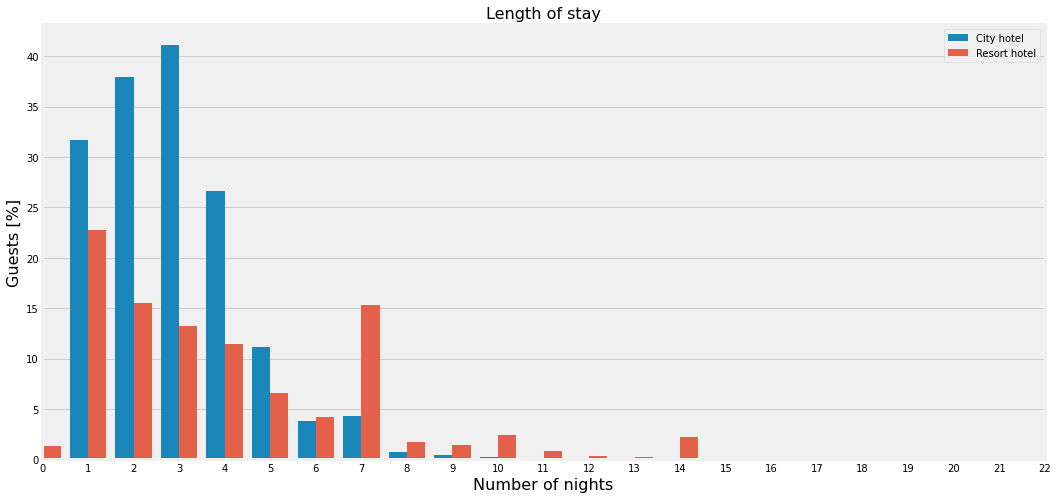

In [30]:
#show figure:
plt.figure(figsize=(16, 8))
sns.barplot(x = "num_nights", y = "rel_num_bookings", hue="hotel", data=nights_data,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

In [31]:
# 리조트 호텔과 시티 호텔의 평균 숙박일과 최대 숙박일
avg_nights_res = sum(list((res_nights["num_nights"] * (res_nights["rel_num_bookings"]/100)).values))
avg_nights_cty = sum(list((cty_nights["num_nights"] * (cty_nights["rel_num_bookings"]/100)).values))

print(f"On average, guests of the City hotel stay {avg_nights_cty:.2f} nights, and {cty_nights['num_nights'].max()} at maximum.")
print(f"On average, guests of the Resort hotel stay {avg_nights_res:.2f} nights, and {res_nights['num_nights'].max()} at maximum.")


On average, guests of the City hotel stay 4.65 nights, and 48 at maximum.
On average, guests of the Resort hotel stay 4.14 nights, and 69 at maximum.


- 도시 호텔의 경우 1-4박을 선호한다.
- 리조트 호텔의 경우 1~4박도 예약이 많이 되지만 7박도 인기가 많은 편이다.

## 2) Data Pre Processing

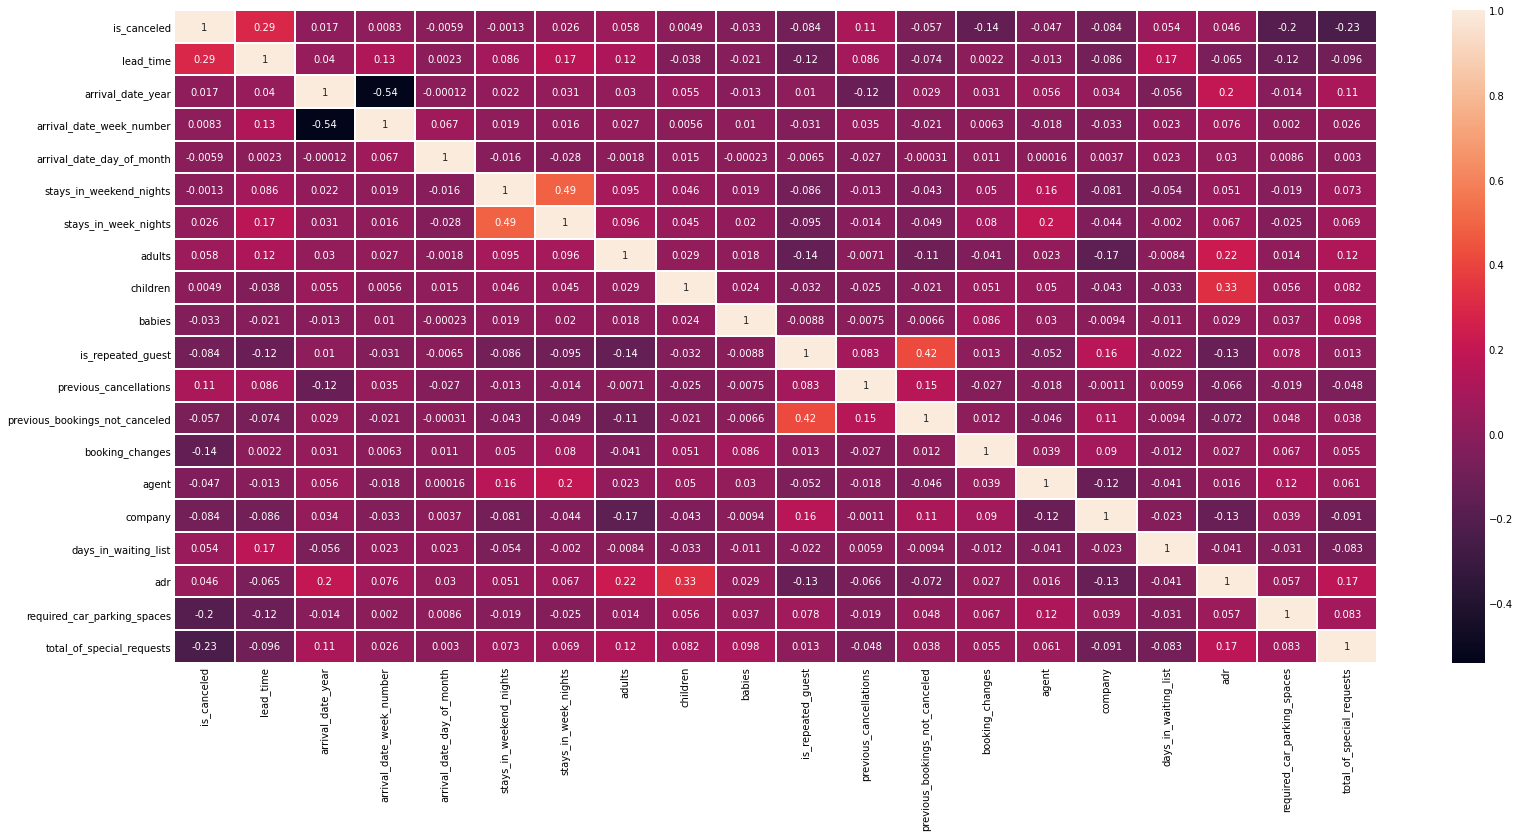

In [32]:
# 히트맵으로 각 feature 간의 연관성을 파악해보자
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [33]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [34]:
# 새로운 데이터프레임 형성
# reserved_room_type = assigned_room_type -> 0
# reserved_room_type != assigned_room_type -> 1
df["change of room type"] = np.where(df['reserved_room_type']==df['assigned_room_type'], 0, 1)

# reserved_room_type, assigned_room_type 열 drop하기
df = df.drop(['reserved_room_type', 'assigned_room_type'], axis=1)

# 필요없는 행 drop하기
useless_col = ['days_in_waiting_list', 'arrival_date_month', 'arrival_date_year', 'arrival_date_week_number', 
               'booking_changes', 'reservation_status', 'country', 'reservation_status_date', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)

In [35]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,change of room type
0,Resort Hotel,0,342,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,No Deposit,0.0,0.0,Transient,0.0,0,0,0
1,Resort Hotel,0,737,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,No Deposit,0.0,0.0,Transient,0.0,0,0,0
2,Resort Hotel,0,7,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,No Deposit,0.0,0.0,Transient,75.0,0,0,1
3,Resort Hotel,0,13,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,No Deposit,304.0,0.0,Transient,75.0,0,0,0
4,Resort Hotel,0,14,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,No Deposit,240.0,0.0,Transient,98.0,0,1,0


In [36]:
df.drop(['arrival_date_day_of_month'] , axis = 1, inplace = True)
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,change of room type
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,No Deposit,0.0,0.0,Transient,0.0,0,0,0
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,No Deposit,0.0,0.0,Transient,0.0,0,0,0
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,No Deposit,0.0,0.0,Transient,75.0,0,0,1
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,No Deposit,304.0,0.0,Transient,75.0,0,0,0
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,No Deposit,240.0,0.0,Transient,98.0,0,1,0


In [37]:
# numerical, categorical 데이터프레임 만들기
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'customer_type']

In [38]:
cat_df = df[cat_cols]
cat_df.head()

,hotel,meal,market_segment,distribution_channel,deposit_type,customer_type
0,Resort Hotel,BB,Direct,Direct,No Deposit,Transient
1,Resort Hotel,BB,Direct,Direct,No Deposit,Transient
2,Resort Hotel,BB,Direct,Direct,No Deposit,Transient
3,Resort Hotel,BB,Corporate,Corporate,No Deposit,Transient
4,Resort Hotel,BB,Online TA,TA/TO,No Deposit,Transient


In [39]:
# unique 값 print하기
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']



In [40]:
cat_df

,hotel,meal,market_segment,distribution_channel,deposit_type,customer_type
0,Resort Hotel,BB,Direct,Direct,No Deposit,Transient
1,Resort Hotel,BB,Direct,Direct,No Deposit,Transient
2,Resort Hotel,BB,Direct,Direct,No Deposit,Transient
3,Resort Hotel,BB,Corporate,Corporate,No Deposit,Transient
4,Resort Hotel,BB,Online TA,TA/TO,No Deposit,Transient
...,...,...,...,...,...,...
119385,City Hotel,BB,Offline TA/TO,TA/TO,No Deposit,Transient
119386,City Hotel,BB,Online TA,TA/TO,No Deposit,Transient
119387,City Hotel,BB,Online TA,TA/TO,No Deposit,Transient
119388,City Hotel,BB,Online TA,TA/TO,No Deposit,Transient


In [41]:
# categorical 변수 인코딩하기
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

In [42]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,deposit_type,customer_type
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,1,1,0,0
4,0,0,2,2,0,0


In [43]:
num_df = df.drop(columns = cat_cols, axis=1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests,change of room type
0,342,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0,0
1,737,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0,0
2,7,0,1,1,0.0,0,0,0,0,0.0,0.0,75.00,0,0,1
3,13,0,1,1,0.0,0,0,0,0,304.0,0.0,75.00,0,0,0
4,14,0,2,2,0.0,0,0,0,0,240.0,0.0,98.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2,5,2,0.0,0,0,0,0,394.0,0.0,96.14,0,0,0
119386,102,2,5,3,0.0,0,0,0,0,9.0,0.0,225.43,0,2,0
119387,34,2,5,2,0.0,0,0,0,0,9.0,0.0,157.71,0,4,0
119388,109,2,5,2,0.0,0,0,0,0,89.0,0.0,104.40,0,0,0


In [44]:
num_df.var()

lead_time                         11422.361808
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
agent                             11485.169679
company                            2897.684308
adr                                2543.589039
required_car_parking_spaces           0.060201
total_of_special_requests             0.628652
change of room type                   0.108713
dtype: float64

In [45]:
# nuimerical 변수 normalize 하기

num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [46]:
num_df.var()

lead_time                         2.582757
stays_in_weekend_nights           0.990258
stays_in_week_nights              3.599010
adults                            0.330838
children                          0.159070
babies                            0.009508
is_repeated_guest                 0.030507
previous_cancellations            0.713887
previous_bookings_not_canceled    2.244415
agent                             3.535793
company                           1.346883
adr                               0.515480
required_car_parking_spaces       0.060201
total_of_special_requests         0.628652
change of room type               0.108713
dtype: float64

In [47]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [48]:
num_df.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests,change of room type
0,5.837730,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0,0
1,6.603944,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0,0
2,2.079442,0,1,1,0.0,0,0,0,0,0.000000,0.0,4.330733,0,0,1
3,2.639057,0,1,1,0.0,0,0,0,0,5.720312,0.0,4.330733,0,0,0
4,2.708050,0,2,2,0.0,0,0,0,0,5.484797,0.0,4.595120,0,1,0


## 3) 타겟데이터 

In [49]:
 X = pd.concat([cat_df, num_df], axis=1)
y = df['is_canceled']

In [50]:
y.value_counts()

0    75011
1    44199
Name: is_canceled, dtype: int64

In [51]:
X.shape, y.shape

((119210, 21), (119210,))

In [52]:
# train 데이터와 test 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((83447, 21), (35763, 21), (83447,), (35763,))

In [53]:
X_train.head()

,hotel,meal,market_segment,distribution_channel,deposit_type,customer_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests,change of room type
99019,1,0,2,2,0,0,5.455321,0,1,3,0.0,0,0,0,0,2.302585,0.0,5.131672,1,0,0
74534,1,0,5,2,3,1,5.828946,1,1,2,0.0,0,0,1,0,0.693147,0.0,4.143135,0,0,0
35728,0,0,2,2,0,0,4.663439,0,3,2,0.0,0,0,0,0,5.484797,0.0,4.694371,0,1,0
9197,0,0,2,2,0,0,4.077537,2,5,2,0.0,0,0,0,0,5.484797,0.0,3.658420,0,1,0
92582,1,0,3,2,0,0,5.308268,0,3,2,0.0,0,0,0,0,4.430817,0.0,4.291555,0,0,0


In [54]:
X_test.head()

,hotel,meal,market_segment,distribution_channel,deposit_type,customer_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests,change of room type
116992,1,0,2,2,0,0,5.602119,0,2,3,0.0,0,0,0,0,2.302585,0.0,5.060060,0,4,0
70292,1,0,5,2,3,0,5.308268,0,4,2,0.0,0,0,0,0,0.000000,0.0,4.709530,0,0,0
35166,0,2,5,2,0,2,5.863631,2,5,2,0.0,0,0,0,0,5.700444,0.0,4.442651,0,0,0
46767,1,0,3,2,0,2,5.023881,0,2,1,0.0,0,0,0,0,2.995732,0.0,4.276666,0,0,1
117644,1,0,3,2,0,0,5.293305,1,4,2,0.0,0,0,0,0,3.367296,0.0,4.649187,0,1,0


In [55]:
y_train.head(), y_test.tail()

(99019    0
 74534    1
 35728    0
 9197     1
 92582    0
 Name: is_canceled, dtype: int64, 100623    0
 109313    0
 76988     0
 85185     0
 66442     1
 Name: is_canceled, dtype: int64)

## Baseline model

In [57]:
# Baseline 모델
y_train.value_counts()

0    52383
1    31064
Name: is_canceled, dtype: int64

In [63]:
y_baseline = pd.Series([0]*len(y_train))

In [64]:
y_train = y_train.astype(int)

In [66]:
from sklearn.metrics import f1_score
f1_score(y_train, y_baseline, average='weighted')

0.48417716267845823

## 4) 모델 만들기

In [68]:
! pip install category_encoders
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

     |████████████████████████████████| 80 kB 7.3 MB/s 


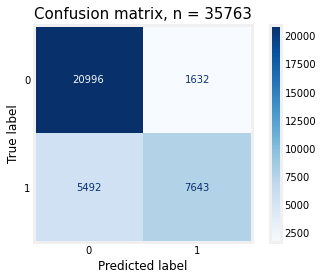

Accuracy Score of Logistic Regression is : 0.8007997091966558
Confusion Matrix : 
[[20996  1632]
 [ 5492  7643]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     22628
           1       0.82      0.58      0.68     13135

    accuracy                           0.80     35763
   macro avg       0.81      0.75      0.77     35763
weighted avg       0.80      0.80      0.79     35763



In [69]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

# Confusion Matrix
fig, ax = plt.subplots()
plt.grid(False)

pcm = plot_confusion_matrix(lr, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax, values_format = '');
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

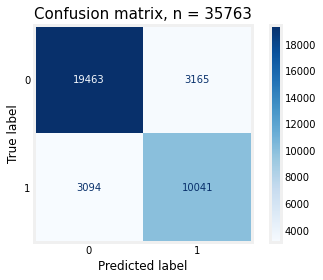

Accuracy Score of Decision Tree is : 0.8249867181164892
Confusion Matrix : 
[[19463  3165]
 [ 3094 10041]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     22628
           1       0.76      0.76      0.76     13135

    accuracy                           0.82     35763
   macro avg       0.81      0.81      0.81     35763
weighted avg       0.83      0.82      0.83     35763



In [70]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
conf = confusion_matrix(y_test, y_pred_dt)
clf_report = classification_report(y_test, y_pred_dt)

# Confusion Matrix
fig, ax = plt.subplots()
plt.grid(False)

pcm = plot_confusion_matrix(dt, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax, values_format = '');
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

print(f"Accuracy Score of Decision Tree is : {acc_dt}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

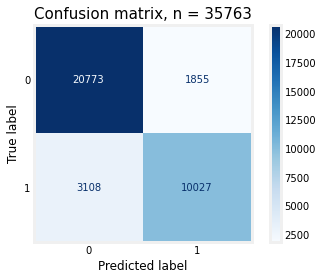

Accuracy Score of Random Forest is : 0.8612252887062047
Confusion Matrix : 
[[20773  1855]
 [ 3108 10027]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     22628
           1       0.84      0.76      0.80     13135

    accuracy                           0.86     35763
   macro avg       0.86      0.84      0.85     35763
weighted avg       0.86      0.86      0.86     35763



In [71]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
conf = confusion_matrix(y_test, y_pred_rf)
clf_report = classification_report(y_test, y_pred_rf)

# Confusion Matrix
fig, ax = plt.subplots()
plt.grid(False)

pcm = plot_confusion_matrix(rf, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax, values_format = '');
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

print(f"Accuracy Score of Random Forest is : {acc_rf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

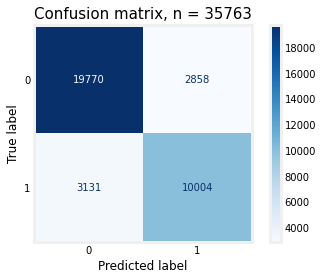

Accuracy Score of Ada Boost Classifier is : 0.8325364203226798
Confusion Matrix : 
[[19770  2858]
 [ 3131 10004]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.87      0.87     22628
           1       0.78      0.76      0.77     13135

    accuracy                           0.83     35763
   macro avg       0.82      0.82      0.82     35763
weighted avg       0.83      0.83      0.83     35763



In [72]:
# Ada Boost Classifier
ada = AdaBoostClassifier(base_estimator = dt)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

# Confusion Matrix
fig, ax = plt.subplots()
plt.grid(False)

pcm = plot_confusion_matrix(ada, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax, values_format = '');
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

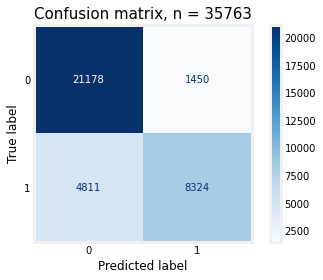

Accuracy Score of Gradient Boosting Classifier is : 0.8249307943964432
Confusion Matrix : 
[[21178  1450]
 [ 4811  8324]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     22628
           1       0.85      0.63      0.73     13135

    accuracy                           0.82     35763
   macro avg       0.83      0.78      0.80     35763
weighted avg       0.83      0.82      0.82     35763



In [73]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

# Confusion Matrix
fig, ax = plt.subplots()
plt.grid(False)

pcm = plot_confusion_matrix(gb, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax, values_format = '');
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

print(f"Accuracy Score of Gradient Boosting Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

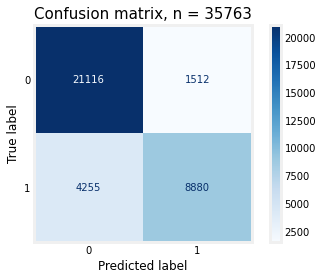

Accuracy Score of XgBoost Classifier is : 0.8387439532477701
Confusion Matrix : 
[[21116  1512]
 [ 4255  8880]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     22628
           1       0.85      0.68      0.75     13135

    accuracy                           0.84     35763
   macro avg       0.84      0.80      0.82     35763
weighted avg       0.84      0.84      0.83     35763



In [74]:
# XgBoost Classifier
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

# Confusion Matrix
fig, ax = plt.subplots()
plt.grid(False)

pcm = plot_confusion_matrix(xgb, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax, values_format = '');
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

print(f"Accuracy Score of XgBoost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

In [75]:
# 모델 비교하기

models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost'],
    'Score' : [acc_lr, acc_dt, acc_rf, acc_ada, acc_gb, acc_xgb]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest Classifier,0.861225
5,XgBoost,0.838744
3,Ada Boost Classifier,0.832536
1,Decision Tree Classifier,0.824987
4,Gradient Boosting Classifier,0.824931
0,Logistic Regression,0.800800


In [76]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', title = 'Models Comparison')

In [77]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import cross_val_score

# 교차 검증
scores = cross_val_score(rf, X_train, y_train, cv=3, 
                         scoring='f1_macro')
scores.mean()

0.8425075341851165

In [78]:
# 하이퍼파라미터 RandomizeCV 찾아보기
from scipy.stats import randint, uniform
dists = {
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1) 
}

In [79]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(
    rf, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='accuracy',  
    verbose=1,
   
    n_jobs=-1

)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 59.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [80]:
# 가장 좋은 파라미터 추출
clf.best_params_

{'max_depth': None, 'max_features': 0.32498033976655005, 'n_estimators': 463}

In [81]:
# 가장 성능 좋은 모델 셋팅
clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None,
                       max_features=0.32498033976655005, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=463, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [82]:
clf.best_score_

0.8577899699820705

In [83]:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score

rf_model_enh = RandomForestClassifier(n_estimators=160,
                               max_features=0.4,
                               min_samples_split=2,
                               n_jobs=-1,
                               random_state=0)
kfolds = 4
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
model_pipe = Pipeline(steps=[('model', rf_model_enh)])
cv_results = cross_val_score(model_pipe, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)

# output:
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"Enhanced RF model cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

Enhanced RF model cross validation accuarcy score: 0.8639 +/- 0.0013 (std) min: 0.8621, max: 0.8657


## 5) 중요한 feature 알아보기

In [84]:
# 특성 중요도(feature_importances_) 뽑기
fi = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['feature_importance'])
fi = fi.sort_values(by=['feature_importance'], ascending=False)
fi

,feature_importance
lead_time,0.220627
adr,0.167636
deposit_type,0.128346
total_of_special_requests,0.067467
agent,0.065478
stays_in_week_nights,0.054785
previous_cancellations,0.044514
market_segment,0.042872
change of room type,0.037803
customer_type,0.033044


<Figure size 720x360 with 0 Axes>

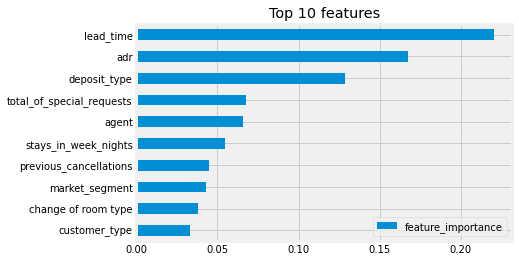

In [85]:
# 시각화
%matplotlib inline
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(10,n/2))
fi.sort_values(by=['feature_importance'])[-n:].plot.barh();
plt.title('Top 10 features');

In [86]:
!pip install eli5

     |████████████████████████████████| 106 kB 33.0 MB/s 


In [87]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer

rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None,
                       max_features=0.5198929744140296, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=307, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [88]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None,
                       max_features=0.5198929744140296, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=307, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [89]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, random_state=1).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.1702 ± 0.0013,lead_time
0.1349 ± 0.0022,total_of_special_requests
0.1299 ± 0.0009,adr
0.1299 ± 0.0009,deposit_type
0.1231 ± 0.0012,agent
0.0824 ± 0.0018,market_segment
0.0685 ± 0.0013,customer_type
0.0630 ± 0.0014,stays_in_week_nights
0.0464 ± 0.0011,stays_in_weekend_nights
0.0432 ± 0.0010,previous_cancellations


## 6) PDP 시각화

In [90]:
!pip install pdpbox

     |████████████████████████████████| 34.0 MB 41 kB/s 
     |████████████████████████████████| 13.1 MB 6.5 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=3f9d9fb91ad9a16b505e427372b8c8d34f9041964f203e51326015ce6ce58ac3
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [91]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

In [92]:
from pdpbox.pdp import pdp_isolate, pdp_plot

# PDP 그래프 함수 생성
def pdp(feature):
    isolated = pdp_isolate(
    model = rf,
    dataset=pd.DataFrame(np.array(X_test), columns = X.columns.tolist()), 
    model_features= X.columns.tolist(), 
    feature=feature,
    grid_type='percentile',
     num_grid_points=15)
    return pdp_plot(isolated, feature_name=feature)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


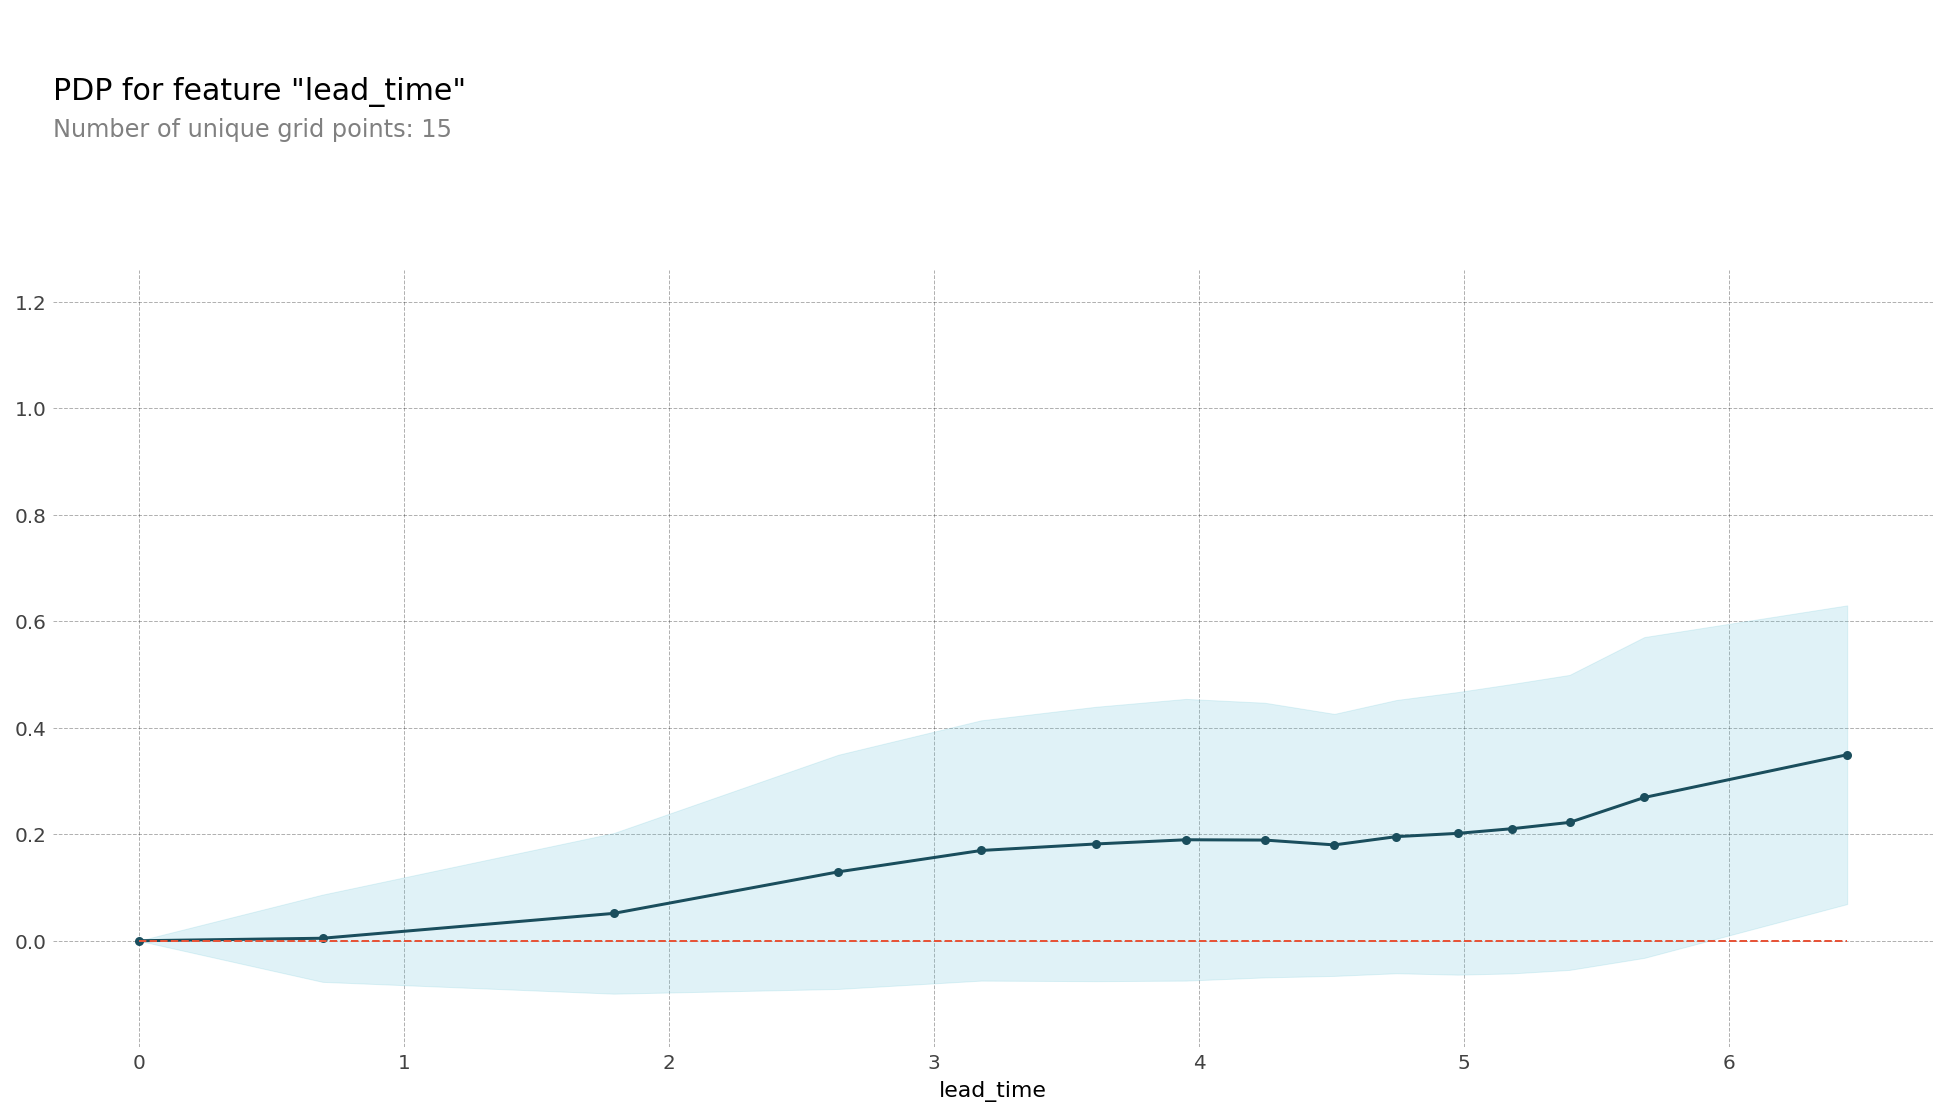

In [93]:
pdp('lead_time');

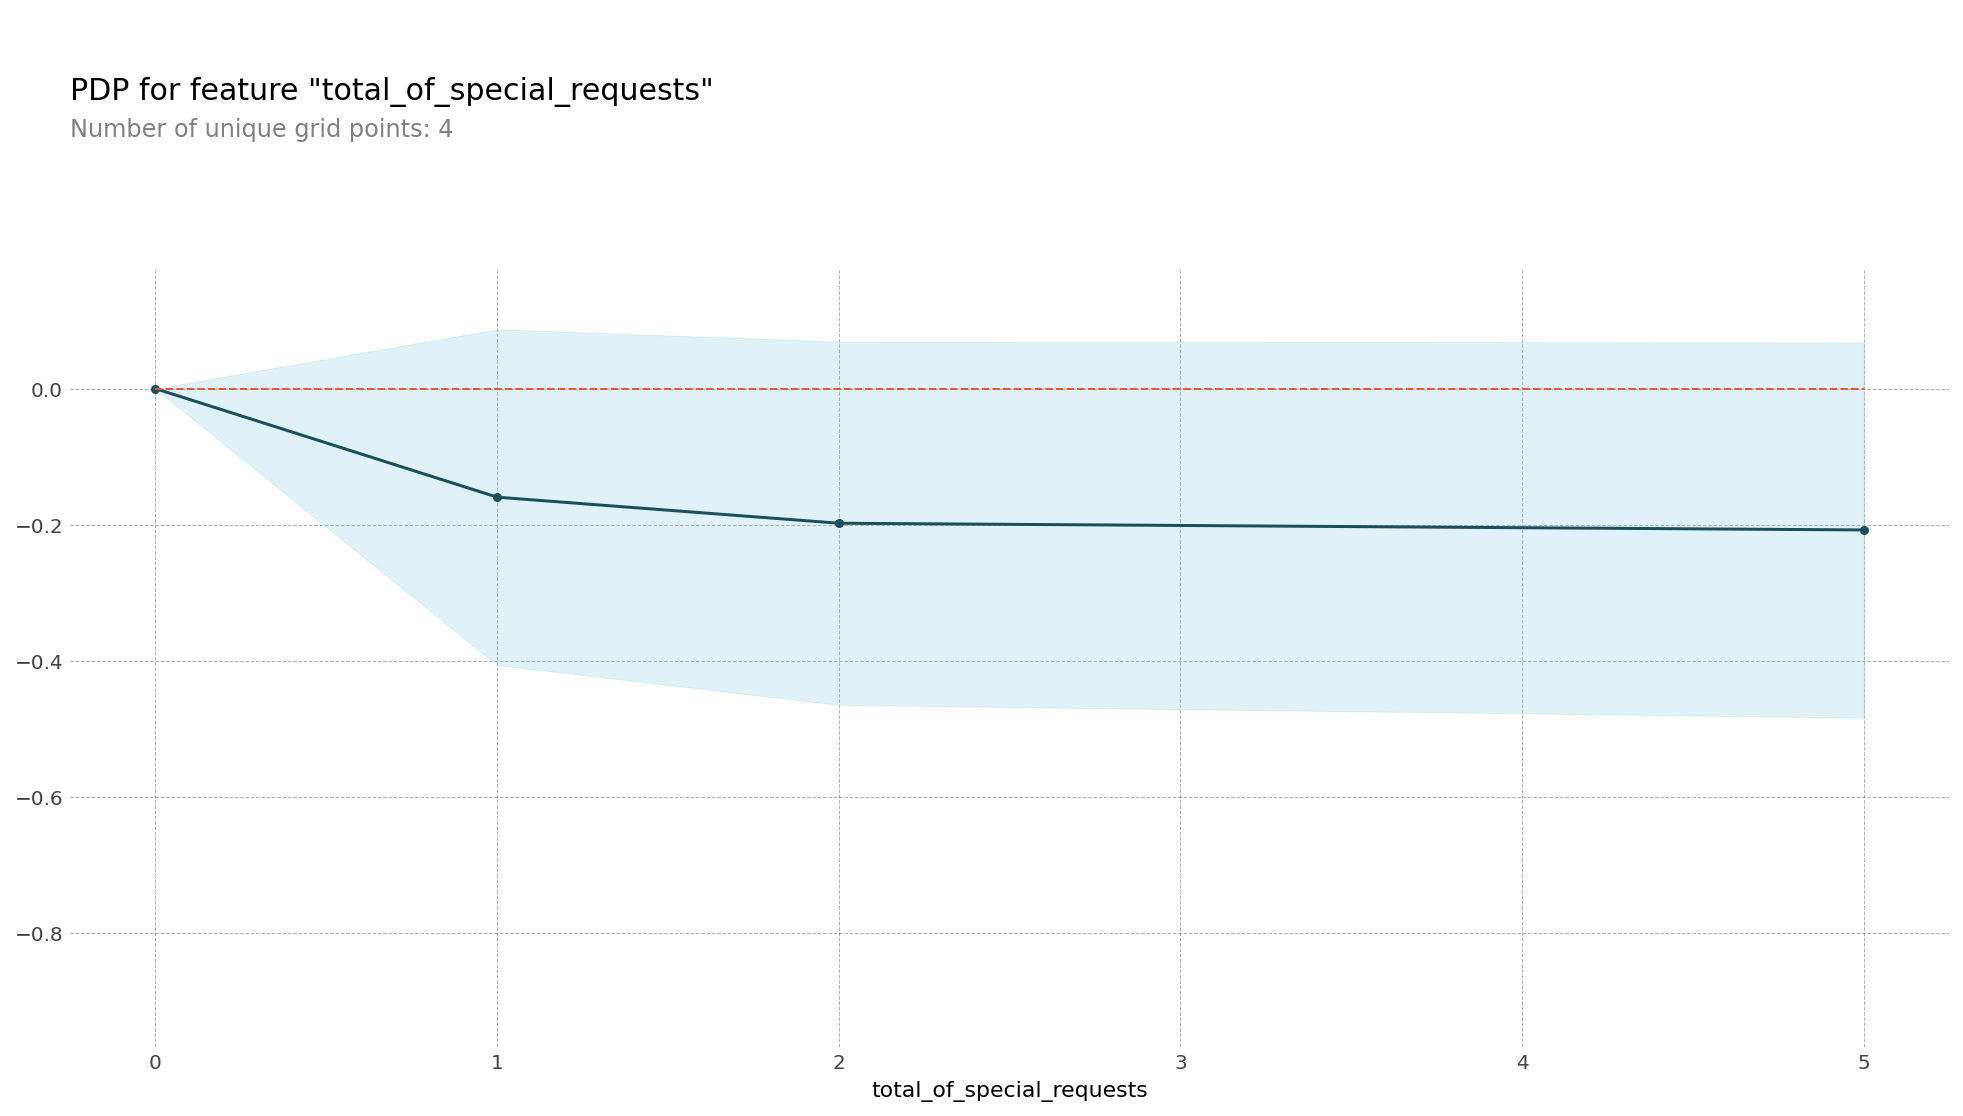

In [94]:
pdp('total_of_special_requests');

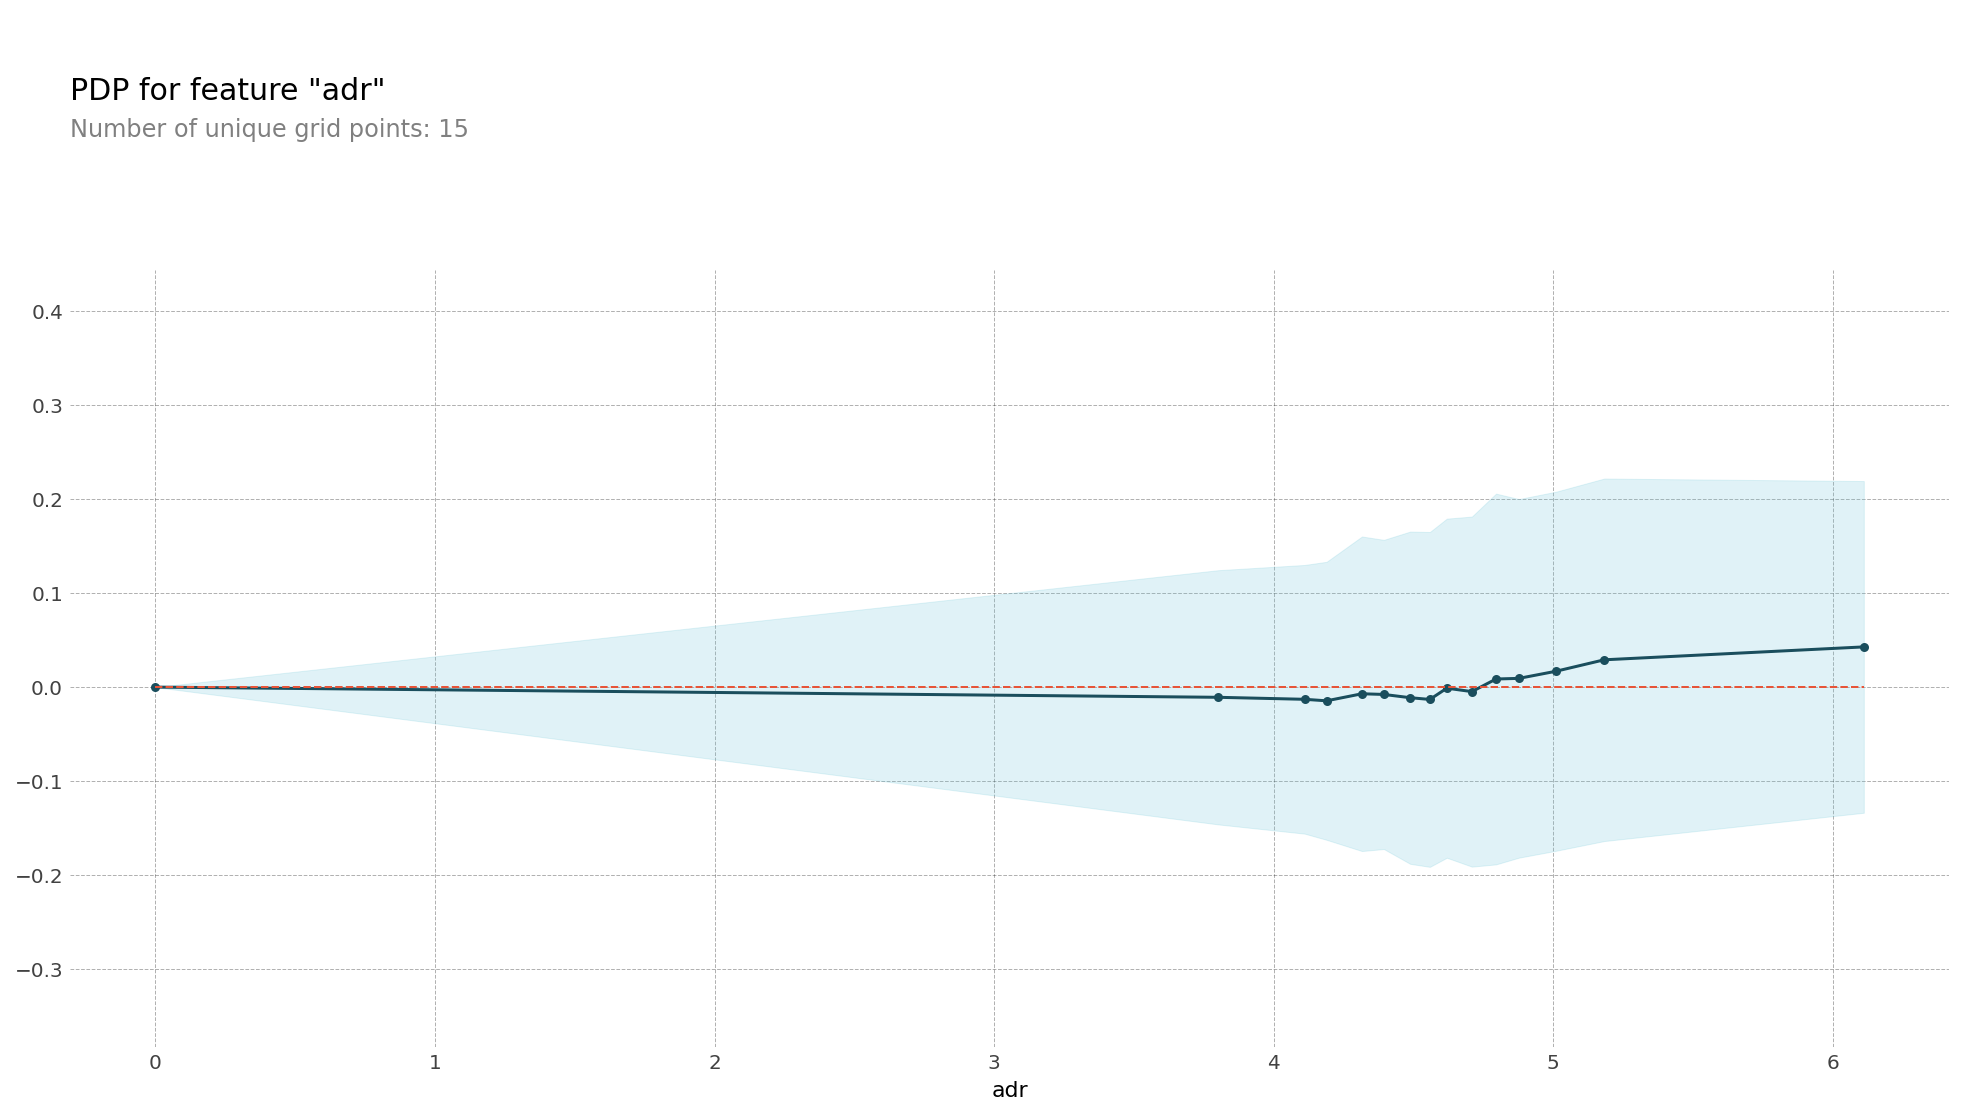

In [95]:
pdp('adr');

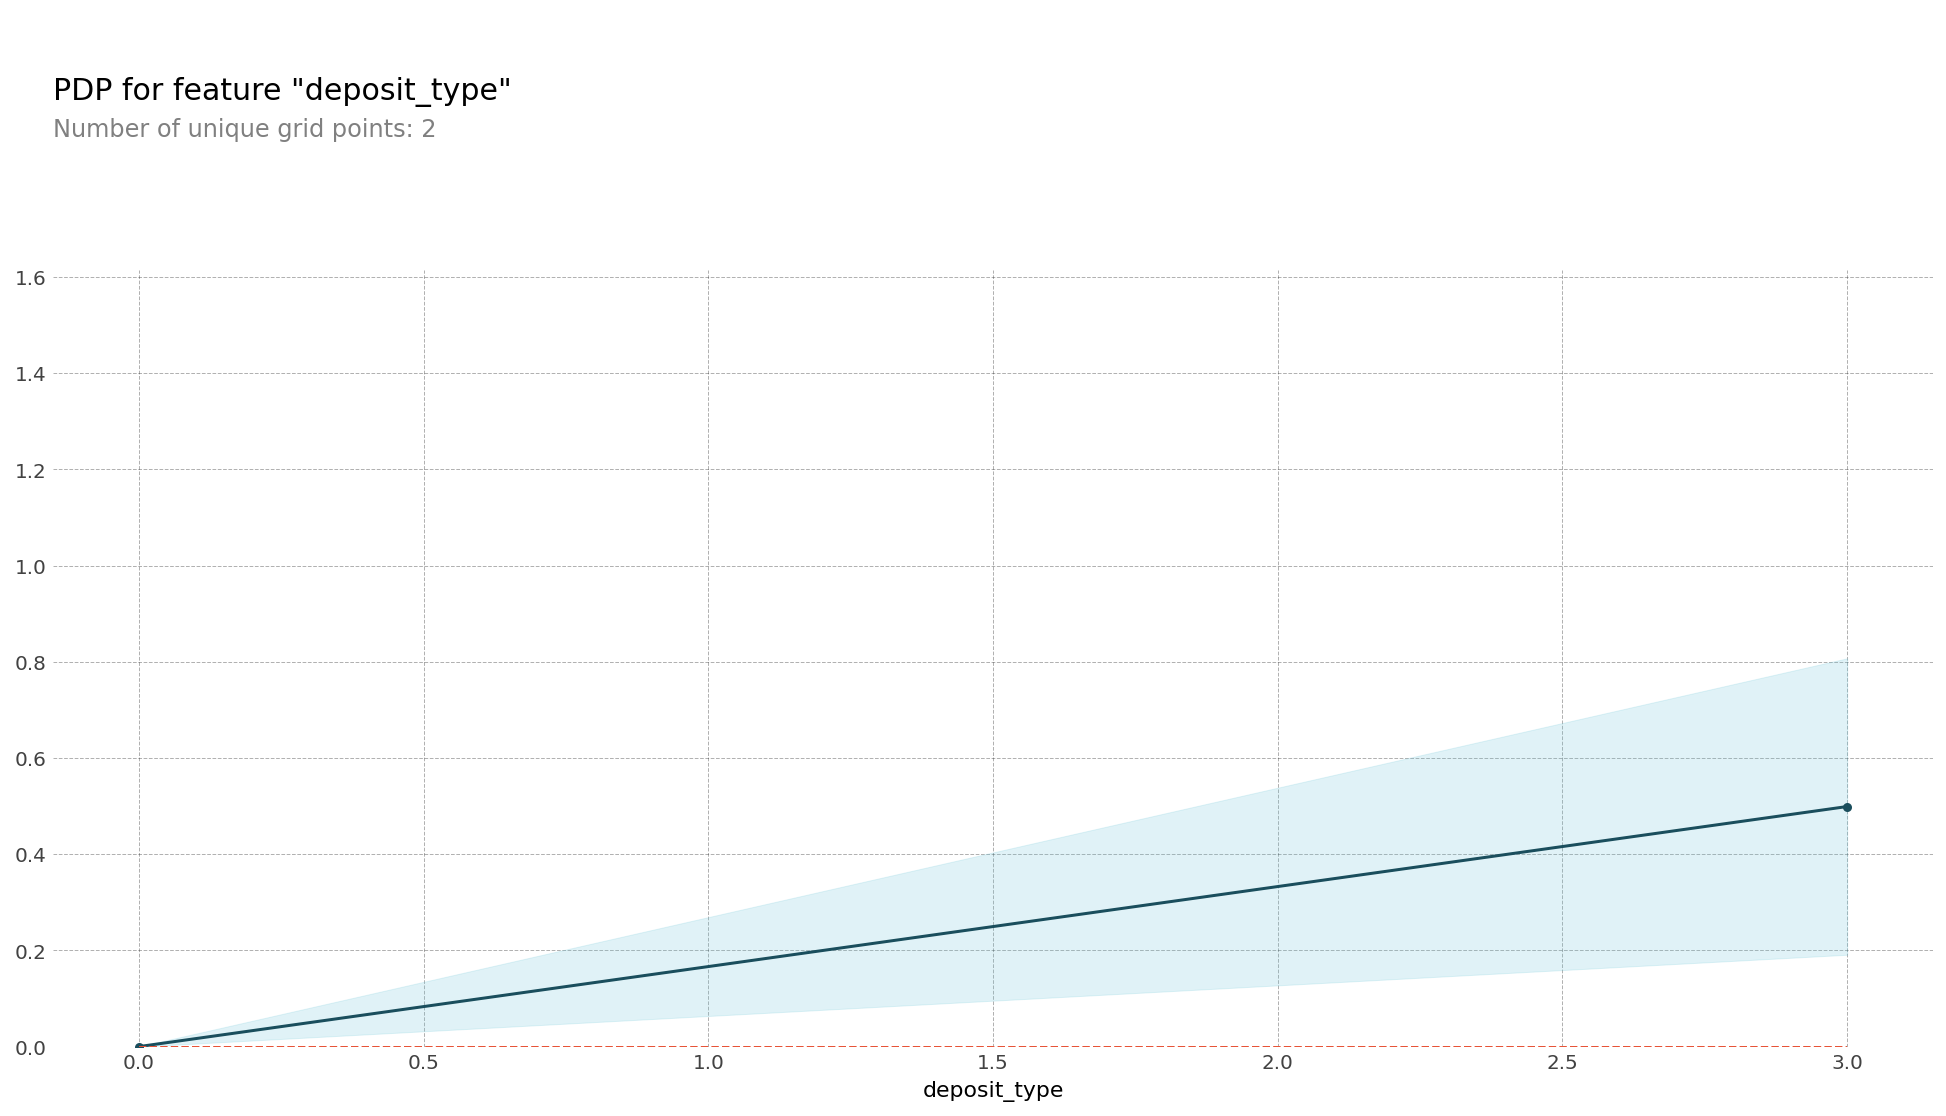

In [96]:
pdp("deposit_type");

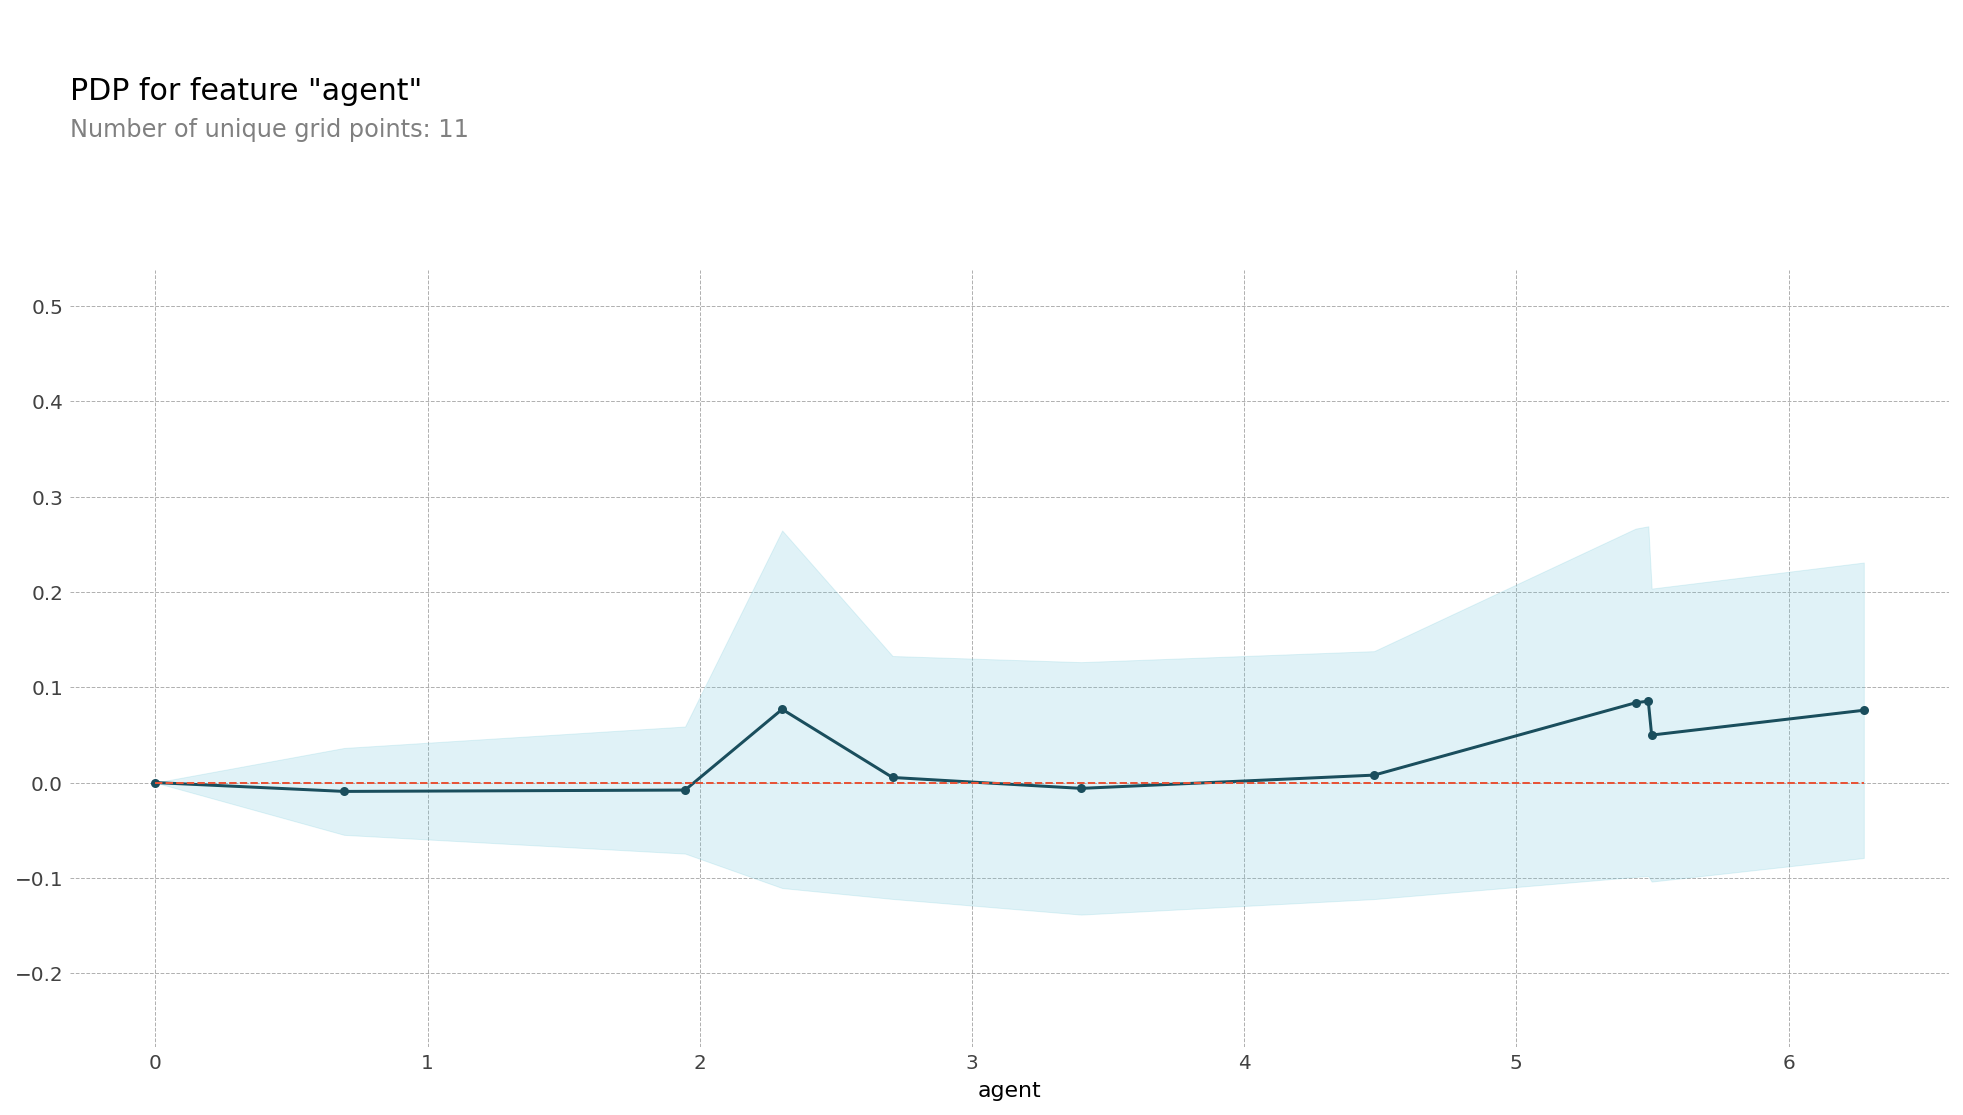

In [97]:
pdp("agent");

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


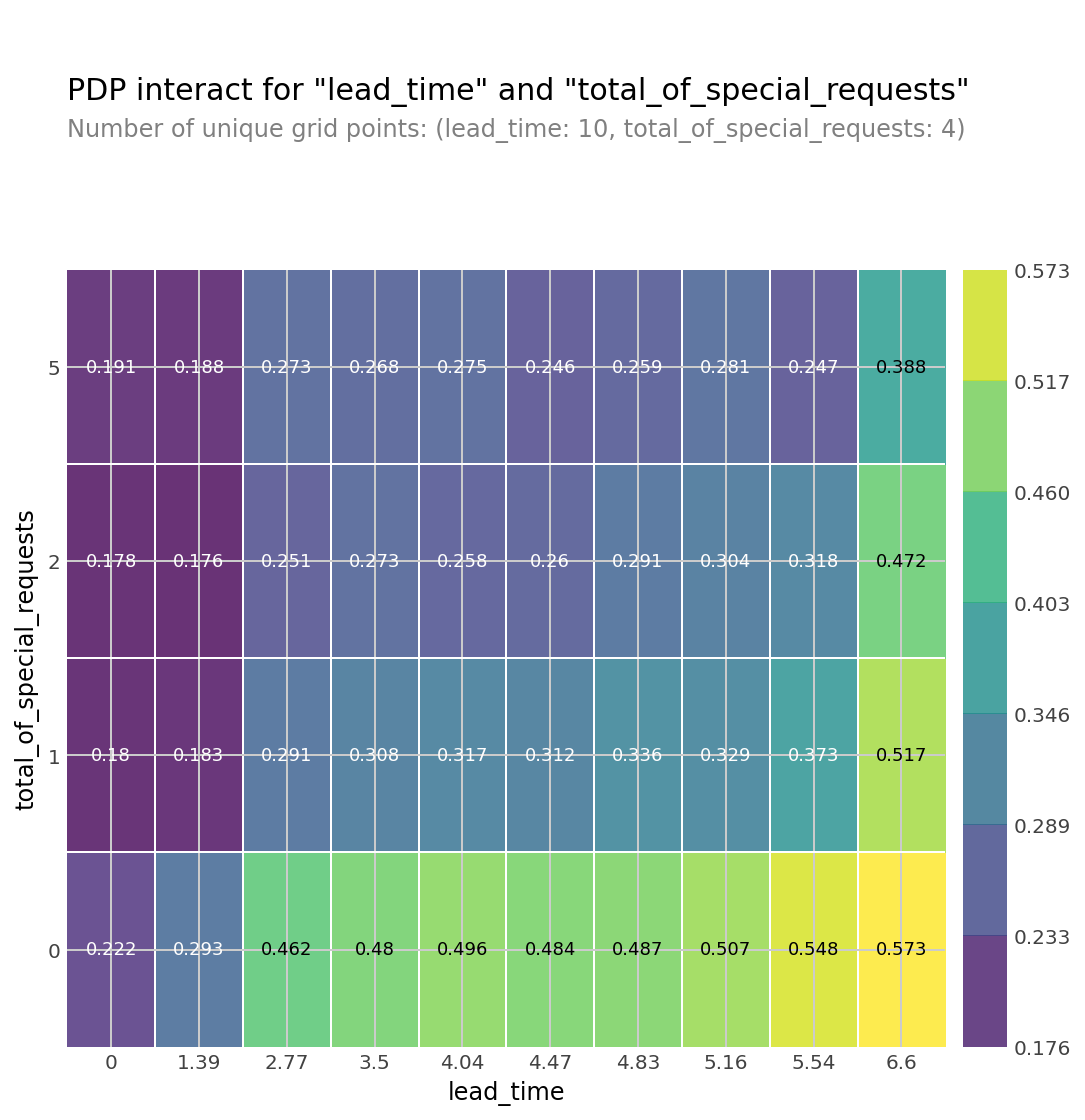

In [98]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

# 2D PDP : 두 특성 간의 의존성 확인
features = ['lead_time', 'total_of_special_requests']

interaction = pdp_interact(
    model=rf, 
    dataset=X_train, 
    model_features=X_train.columns.tolist(), 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

## 7) SHAP 시각화

In [99]:
!pip install shap

     |████████████████████████████████| 356 kB 39.2 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491635 sha256=9781eaf5c542d27e364566599a885fbd622dbdf152e156a41c43beaf8ffe730c
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [100]:
row = X.iloc[[80326]]

In [101]:
rf.predict(row)

array([1])

In [102]:
# 예측 값이 1이 나오는데 영향을 주는 특성
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0], 
    shap_values=shap_values[0][0,:]
    ,features=row)



# 예측 1에 대한 긍정적 요소 빨간색 특성들, 부정적 영향을 주는 요소는 파란색 특성들

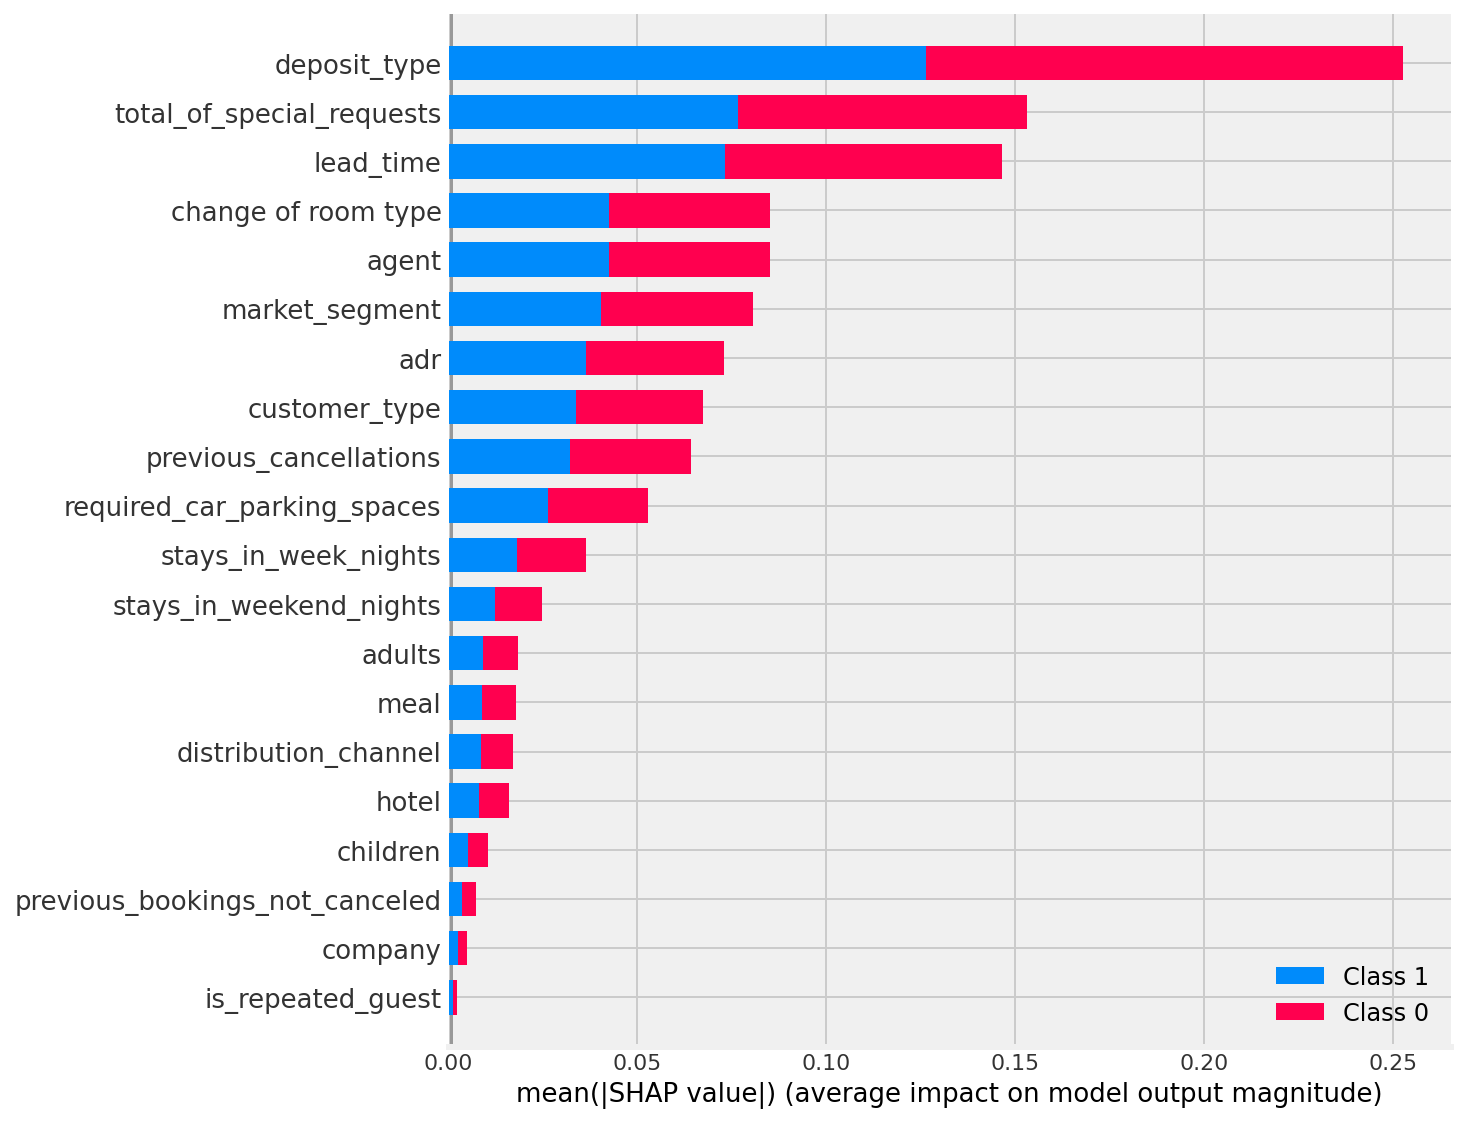

In [104]:
shap_values = explainer.shap_values(X_train.iloc[1000:2000])
shap.summary_plot(shap_values, X_train.iloc[1000:2000])